# **K-Nearest Neighbors**

Teacher: Applied ML tEAM

Lesson: 4

Estimated time needed: **90** minutes

## Objectives

After completing this lab you will be able to:

*   Use K Nearest neighbors to classify data

In this Lab you will load the KDD'99 dataset, fit the data, and use K-Nearest Neighbors to predict a data point. But what is **K-Nearest Neighbors**?

**K-Nearest Neighbors** is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.

### Here's an visualization of the K-Nearest Neighbors algorithm.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/KNN_Diagram.png">

In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points), we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.


In this sense, it is important to consider the value of k. Hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (data points) when it predicts the classification of the test point.

# **Business understanding**

 The task is to build a network intrusion detector, a predictive model capable of distinguishing between ``bad’’ connections, called intrusions or attacks, and “good” normal connections. This database contains a standard set of data to be audited, which includes a wide variety of intrusions simulated in a military network environment. The training and test datasets are also available in the UC Irvine KDD archive.

 Software to detect network intrusions protects a computer network from unauthorized users, including perhaps insiders. The intrusion detector learning task is to build a predictive model (i.e. a classifier) capable of distinguishing between bad'' connections, called intrusions or attacks, and good’’ normal connections.

# **Data Understanding**
# About the dataset

Lincoln Labs set up an environment to acquire nine weeks of raw TCP dump data for a local-area network (LAN) simulating a typical U.S. Air Force LAN. They operated the LAN as if it were a true Air Force environment, but peppered it with multiple attacks.

The raw training data was about four gigabytes of compressed binary TCP dump data from seven weeks of network traffic. This was processed into about five million connection records. Similarly, the two weeks of test data yielded around two million connection records.

A connection is a sequence of TCP packets starting and ending at some well defined times, between which data flows to and from a source IP address to a target IP address under some well defined protocol. Each connection is labeled as either normal, or as an attack, with exactly one specific attack type. Each connection record consists of about 100 bytes.

For more details about the used dataset you can see:

https://datahub.io/machine-learning/kddcup99#resource-kddcup99

In [113]:
# Let's import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder

In [114]:
#Read the dataset
set = pd.read_csv('kdd.csv')

In [115]:
set.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [116]:
set.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [117]:
set.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal
494019,0,tcp,http,SF,219,1234,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal


In [118]:
#data shape
print(set.shape)

(494020, 42)


In [119]:
set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

In [120]:
# data decription
set.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,...,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685308e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,...,232.471248,188.666052,0.753781,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,...,64.744601,106.040205,0.410780,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The 'describe()' method is useful for understanding the central tendency, dispersion, and other summary statistics of a dataset column.

In [121]:
print(set['label'].value_counts())

label
smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: count, dtype: int64


In [122]:
set.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [123]:
set.isna().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [124]:
set = set.dropna()

In [125]:
set.isna().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [126]:
set.duplicated().sum()

348435

In [127]:
## Removing the duplicates from the given dataset.
set.drop_duplicates(inplace=True)

In [128]:
#check duplicates droped
set.duplicated().sum()

0

# Data visualization

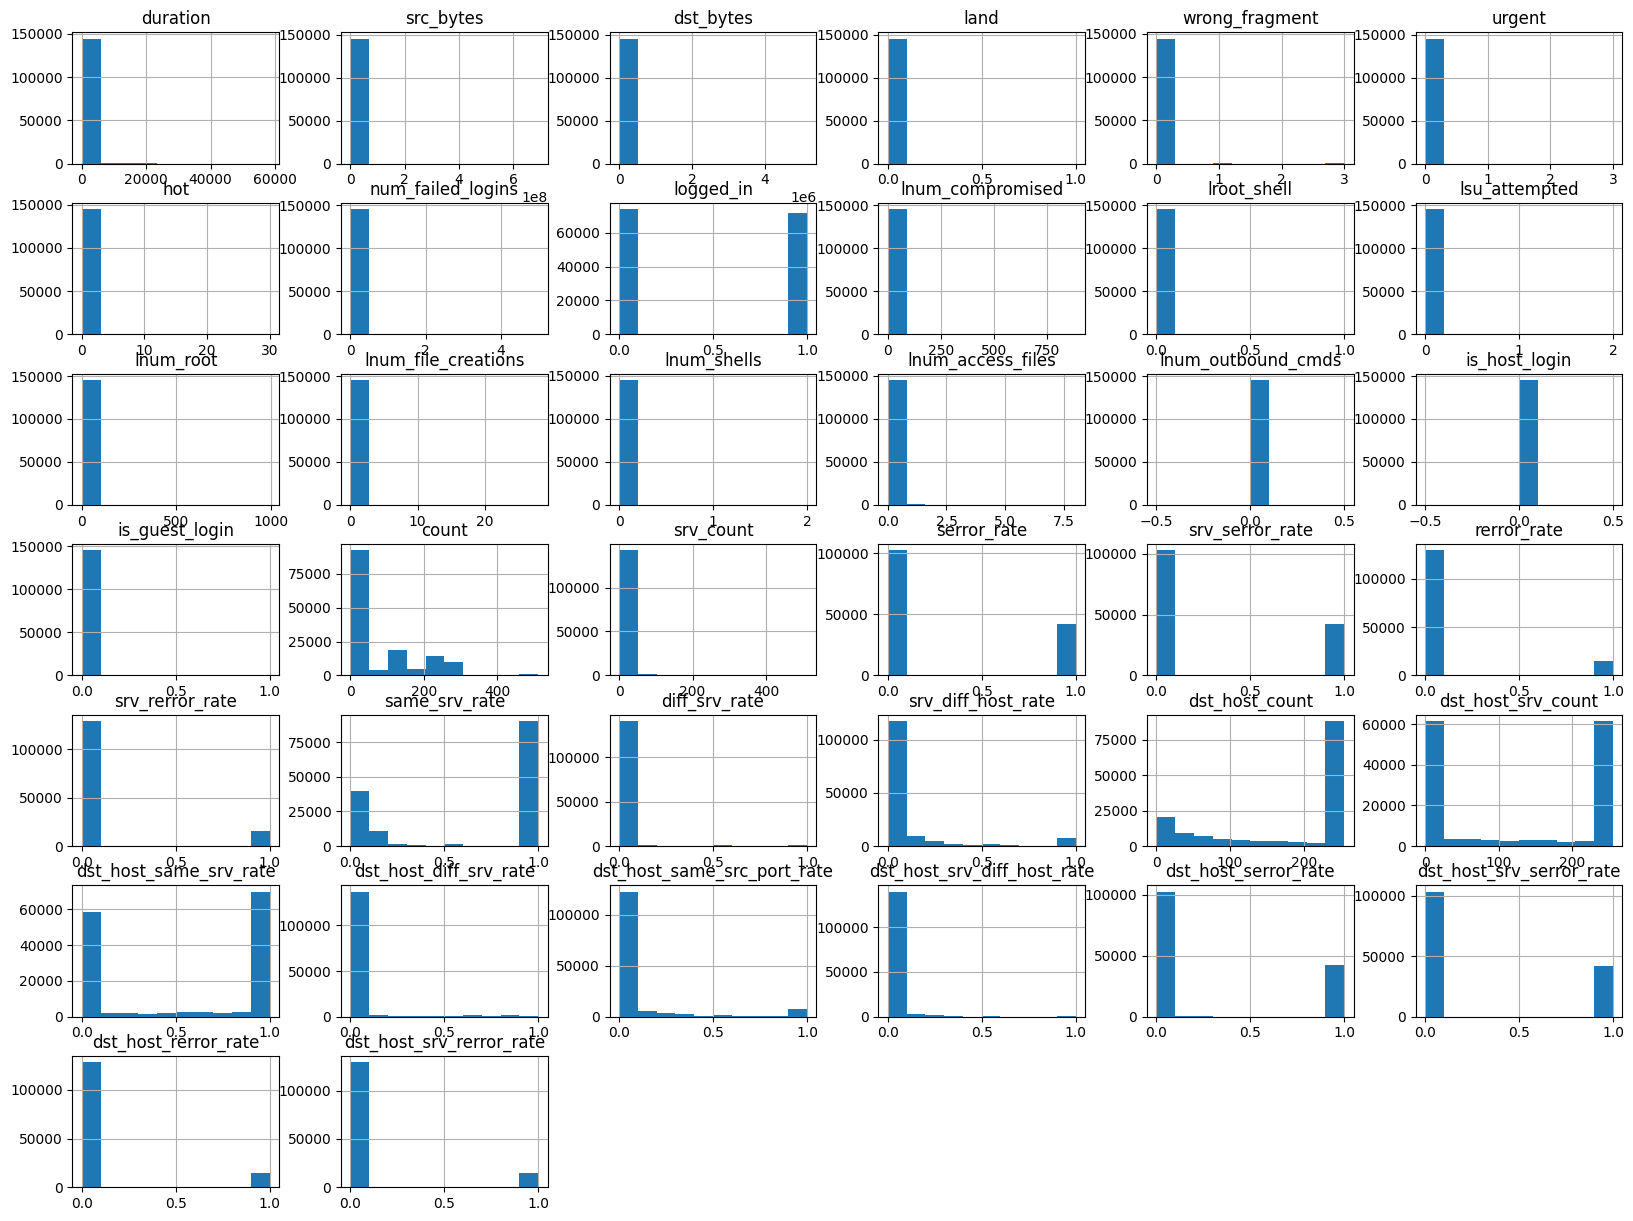

In [129]:
# Displying Histograms
set.hist(figsize=(20,15))
plt.show()

Histograms are used to visualize the distribution of a dataset. You can observe the shape of the distribution, identify peaks or clusters, and get a sense of the spread of the data

In [130]:
# Describe the target
print(set['label'].describe())

count     145585
unique        23
top       normal
freq       87831
Name: label, dtype: object


provides summary statistics for the 'label' column in your dataset. Let's break down each of the values:

count: 145,585 - This indicates the total number of entries or rows in the 'label' column. In your case, there are 145,585 entries.

unique: 23 - This represents the number of unique values in the 'label' column. In your dataset, there are 23 unique labels.

top: 'normal' - This is the most frequently occurring label in the 'label' column. In your dataset, 'normal' is the most common label.

freq: 87,831 - This is the frequency of the most common label, which is 'normal'. It tells you how many times 'normal' appears in the 'label' column.
This information provides a basic overview of the distribution of labels in your dataset

<Axes: >

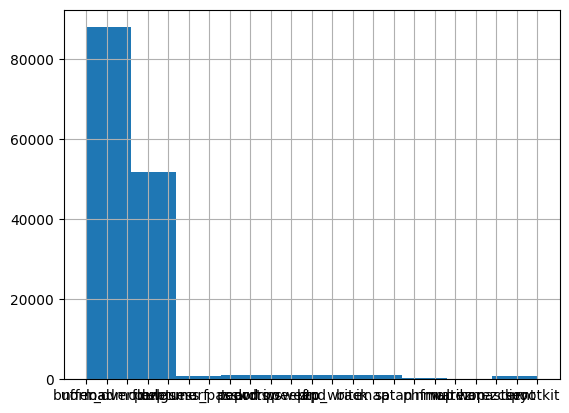

In [131]:
set['label'].hist()

In [132]:
#calculate the relative frequencies of unique values in the "label" column
set["label"].value_counts() / len(set)

,count
label,
normal,0.603297
neptune,0.355943
back,0.006649
teardrop,0.006306
satan,0.006223
warezclient,0.006134
ipsweep,0.004472
smurf,0.004403
portsweep,0.002857


 This provides the relative frequency (or proportion) of each unique label in the 'label' column. It shows the percentage of each label in your dataset.

 'normal' has a relative frequency of approximately 60.33%, which means that about 60.33% of the entries in the 'label' column have the value 'normal'.
 'neptune' has a relative frequency of approximately 35.59%, indicating that about 35.59% of the entries are labeled as 'neptune'.

## Discovering the given dataset deeply.

In [133]:
#set = set.copy()

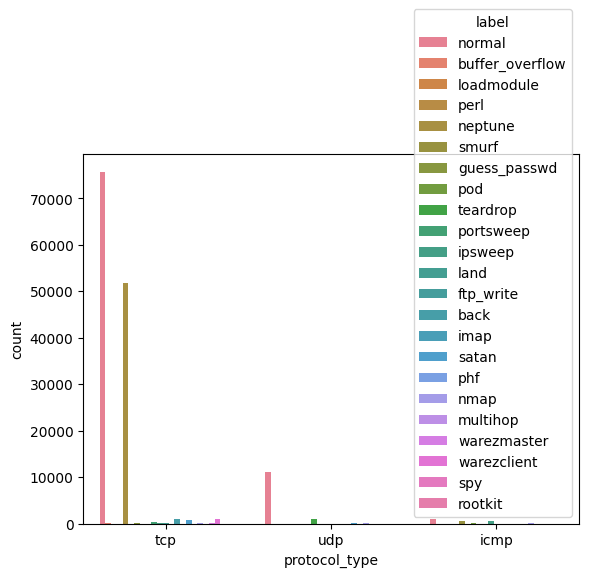

In [134]:
sns.countplot(x = 'protocol_type',hue = "label",data = set)
plt.show()

This help us to know that there's various factors on which attacks depends.
For example when using TCP we have less risq to be attacked.

Guest Login vs Traffic status
Influence of guest login


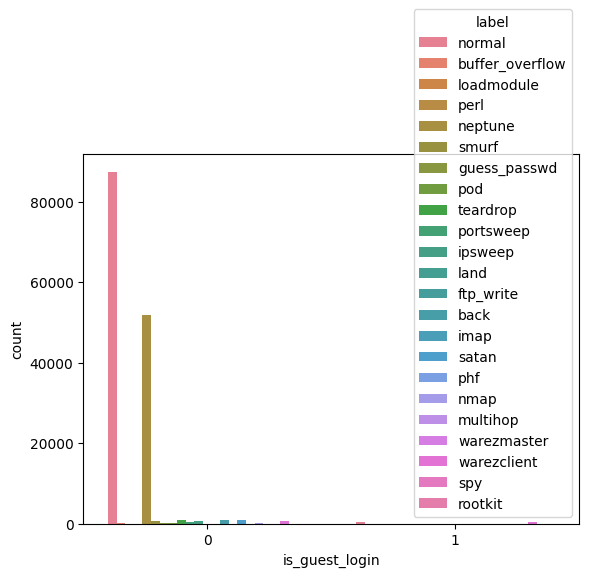

In [135]:
sns.countplot(x = 'is_guest_login',hue = "label",data = set)
print("Guest Login vs Traffic status")
print('Influence of guest login')
plt.show()

By analysing the above two graphs we came to know that, Most of the UDP and tcp protocols denote the normal traffic. It also means that UDP and TCP are more vulnerable in compare with others. If it is not a guest login then more chance the traffic denotes DOS attack.

In [136]:
#sns.countplot(x = 'land',hue = "label",data = set)
#print("Land status vs Target")
#plt.show()

# Correlations.

In [137]:
# Display correlation matrix for numerical columns
corr = set.corr(numeric_only=True)
corr

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.004280,0.002582,-0.001264,-0.009102,0.003707,0.009855,0.004343,-0.090667,0.061454,...,0.062702,-0.116825,-0.120374,0.429391,0.353499,-0.028847,-0.067714,-0.067908,-0.003710,0.002456
src_bytes,0.004280,1.000000,-0.000162,-0.000051,-0.000365,-0.000018,0.003999,-0.000077,-0.000928,0.000025,...,-0.000117,-0.003937,-0.002144,0.000138,0.005619,0.000760,-0.001742,0.001111,-0.001092,0.001327
dst_bytes,0.002582,-0.000162,1.000000,-0.000551,-0.003969,0.016147,0.000658,0.048789,0.028107,0.022755,...,-0.034975,0.013326,0.031658,-0.016820,0.028689,0.001728,-0.028956,-0.028726,-0.014865,-0.015282
land,-0.001264,-0.000051,-0.000551,1.000000,-0.000989,-0.000056,-0.000823,-0.000211,-0.011524,-0.000093,...,-0.021110,-0.012802,0.007972,-0.002662,0.037464,0.106807,0.015462,0.008634,-0.003981,-0.004149
wrong_fragment,-0.009102,-0.000365,-0.003969,-0.000989,1.000000,-0.000400,-0.005925,-0.001521,-0.082969,-0.000667,...,0.039511,-0.051513,-0.051004,0.085303,0.064637,-0.009676,-0.049450,-0.054156,0.029722,-0.029871
urgent,0.003707,-0.000018,0.016147,-0.000056,-0.000400,1.000000,0.000142,0.141954,0.004818,0.014268,...,-0.006155,-0.005306,-0.003356,0.013441,0.002639,-0.001494,-0.003053,-0.003040,-0.001709,-0.001677
hot,0.009855,0.003999,0.000658,-0.000823,-0.005925,0.000142,1.000000,0.007997,0.070770,0.003533,...,0.001459,-0.037462,-0.024315,-0.010236,-0.018592,-0.018851,-0.043728,-0.044732,-0.020471,-0.021826
num_failed_logins,0.004343,-0.000077,0.048789,-0.000211,-0.001521,0.141954,0.007997,1.000000,-0.013872,0.006824,...,-0.021351,-0.017022,0.008763,-0.002344,0.002878,0.016871,-0.007589,-0.008348,0.031271,0.029892
logged_in,-0.090667,-0.000928,0.028107,-0.011524,-0.082969,0.004818,0.070770,-0.013872,1.000000,0.008041,...,-0.473356,0.759853,0.769712,-0.308655,-0.095757,0.033623,-0.627962,-0.627837,-0.331082,-0.320662
lnum_compromised,0.061454,0.000025,0.022755,-0.000093,-0.000667,0.014268,0.003533,0.006824,0.008041,1.000000,...,-0.006565,-0.005592,-0.002194,-0.000609,-0.001620,-0.000536,-0.004086,-0.003538,-0.002371,-0.002377


The values range from -1 to 1, where:

1 indicates a perfect positive correlation,
-1 indicates a perfect negative correlation, and
0 indicates no correlation.

# Dropping some columns of given dataset after indentifying strong correlations.

In [139]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
set.drop('lnum_root',axis = 1,inplace = True)

In [140]:
#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
set.drop('srv_serror_rate',axis = 1,inplace = True)

In [141]:
#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
set.drop('srv_rerror_rate',axis = 1, inplace=True)

In [142]:
#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
set.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

In [143]:
#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
set.drop('dst_host_serror_rate',axis = 1, inplace=True)

In [144]:
#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
set.drop('dst_host_rerror_rate',axis = 1, inplace=True)

In [145]:
#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
set.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

In [146]:
#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9736854572953938)
set.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [147]:
#This variable has zeroes in all the instances so we are ignored for analyzsis.
set.drop(['lnum_outbound_cmds','is_host_login'],axis=1,inplace=True)

In [148]:
set.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
count,145585.000000,1.455850e+05,1.455850e+05,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,...,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000
mean,132.026088,7.995752e+03,2.859788e+03,0.000137,0.020201,0.000048,0.100175,0.000515,0.491486,0.026177,...,0.291381,0.108356,0.655192,0.040576,0.093078,181.469423,129.935570,0.061389,0.092826,0.019048
std,1224.161209,1.820390e+06,6.081000e+04,0.011720,0.239369,0.010150,1.426803,0.028586,0.499929,3.311384,...,0.452904,0.308962,0.446795,0.120396,0.241952,99.097396,114.714717,0.147021,0.241124,0.060410
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.080000,0.000000,0.000000,78.000000,12.000000,0.000000,0.000000,0.000000
50%,0.000000,1.470000e+02,1.050000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,117.000000,0.020000,0.000000,0.000000
75%,0.000000,2.880000e+02,1.164000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,0.070000,0.030000,0.020000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000


In [149]:
set.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0.0,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,0.0,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,0.0,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,0.0,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0.0,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal


# Dealing with categorical values

In [150]:
set['service'].value_counts()

,count
service,
http,62053
private,49057
smtp,9721
domain_u,5425
other,4769
...,...
X11,11
tim_i,5
pm_dump,1


In [151]:
set['flag'].value_counts()

,count
flag,
SF,87458
S0,42278
REJ,14712
RSTO,569
RSTR,425
S1,57
SH,34
S2,24
RSTOS0,11


In [152]:
set['protocol_type'].value_counts()

,count
protocol_type,
tcp,130912
udp,12267
icmp,2406


In [153]:
pmap = {'icmp': 0, 'tcp': 1, 'udp': 2}
set['protocol_type'] = set['protocol_type'].map(pmap)

In [154]:
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
set['flag'] = set['flag'].map(fmap)

In [155]:
set.drop('service',axis = 1,inplace= True)

In [156]:
set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145585 entries, 0 to 494019
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     145585 non-null  int64  
 1   protocol_type                145585 non-null  int64  
 2   flag                         145585 non-null  int64  
 3   src_bytes                    145585 non-null  int64  
 4   dst_bytes                    145585 non-null  int64  
 5   land                         145585 non-null  int64  
 6   wrong_fragment               145585 non-null  int64  
 7   urgent                       145585 non-null  int64  
 8   hot                          145585 non-null  int64  
 9   num_failed_logins            145585 non-null  int64  
 10  logged_in                    145585 non-null  int64  
 11  lnum_compromised             145585 non-null  int64  
 12  lroot_shell                  145585 non-null  int64  
 13  lsu_

In [157]:
set.columns

Index(['duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'lnum_compromised', 'lroot_shell', 'lsu_attempted',
       'lnum_file_creations', 'lnum_shells', 'lnum_access_files',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'label'],
      dtype='object')

# Feature scaling

In [159]:
# Assuming 'Label' is the target variable
y = set['label']

# Selecting predictive features (excluding 'Label' column)
X = set.drop(['label'], axis=1)

In [160]:
from sklearn.preprocessing import StandardScaler

standadizer=StandardScaler()
data=standadizer.fit_transform(X)
data

array([[-0.10785062, -0.21838352, -0.70377728, ..., -0.41755686,
         0.07122679, -0.31531126],
       [-0.10785062, -0.21838352, -0.70377728, ..., -0.41755686,
        -0.17760862, -0.31531126],
       [-0.10785062, -0.21838352, -0.70377728, ..., -0.41755686,
        -0.26055375, -0.31531126],
       ...,
       [-0.10785062, -0.21838352, -0.70377728, ..., -0.41755686,
        -0.13613605,  0.51237114],
       [-0.10785062, -0.21838352, -0.70377728, ..., -0.41755686,
        -0.21908119,  0.51237114],
       [-0.10785062, -0.21838352, -0.70377728, ..., -0.41755686,
         0.3200622 ,  0.51237114]])

# Encoding the target

In [161]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
set['label'] = label_encoder.fit_transform(set['label'])
set['label'].value_counts()

,count
label,
11,87831
9,51820
0,968
20,918
17,906
21,893
5,651
18,641
15,416


In [162]:
from collections import Counter
Counter(X)

# To check the Counter starting from 0 to 5.

Counter({'duration': 1,
         'protocol_type': 1,
         'flag': 1,
         'src_bytes': 1,
         'dst_bytes': 1,
         'land': 1,
         'wrong_fragment': 1,
         'urgent': 1,
         'hot': 1,
         'num_failed_logins': 1,
         'logged_in': 1,
         'lnum_compromised': 1,
         'lroot_shell': 1,
         'lsu_attempted': 1,
         'lnum_file_creations': 1,
         'lnum_shells': 1,
         'lnum_access_files': 1,
         'is_guest_login': 1,
         'count': 1,
         'srv_count': 1,
         'serror_rate': 1,
         'rerror_rate': 1,
         'same_srv_rate': 1,
         'diff_srv_rate': 1,
         'srv_diff_host_rate': 1,
         'dst_host_count': 1,
         'dst_host_srv_count': 1,
         'dst_host_diff_srv_rate': 1,
         'dst_host_same_src_port_rate': 1,
         'dst_host_srv_diff_host_rate': 1})

## **Modeling**.

# Splitting the data

In [163]:
# Split he data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [164]:
#shape of our data
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (116468, 30) (116468,)
Test set: (29117, 30) (29117,)


# Applying KNN

In [165]:
# Applying the KNN algorithm
from sklearn.neighbors  import KNeighborsClassifier
k = 4
knn_clf = KNeighborsClassifier(n_neighbors = k)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

# Prediction of new values

In [166]:
# Predict new observations
yhat = knn_clf.predict(X_test)

# **Evaluation**

In [167]:

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn_clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9960160730844524
Test set Accuracy:  0.9950544355531133


# Finding the best K for the KNN algorithm

In [168]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.99553525, 0.99522616, 0.99567263, 0.99505444, 0.99502009,
       0.99508878, 0.9949514 , 0.99471099, 0.99471099])

In [169]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.9956726311089742 with k= 3
